In [ ]:
import os
import numpy as np
import pprint
from fastestimator.summary.logs import parse_log_file
import matplotlib.pyplot as plt

In [12]:
def plot_box_among_exp(ylim=None):
    acc = {}
    for init_lr in ["0.01", "0.001", "0.0001"]:
        acc[init_lr] = []
        for exp in ["n_1", "n_2", "n_3", "n_4", "n_5", "n_6"]:
            stat = []
            for model_run in range(1,6):
                for run in range(5):
                    summary = parse_log_file(f"../../../logs/supplementary/n_study/{exp}/run_{model_run}/image_classification/{init_lr}_{run}.txt", ".txt")
                    max_acc = np.max([x for x in summary.history["eval"]["accuracy"].values()])
                    stat.append(max_acc)
            acc[init_lr].append(stat)
            
#     if not ylim:
#         max_list, min_list = [], []
#         for _, val in acc.items():
#             max_list.append(np.max(val))
#             min_list.append(np.min(val))

#         max_val = max(max_list)
#         min_val = min(min_list)

#         top_limit = (max_val + min_val)/2 + (max_val - min_val)/2*1.05
#         bot_limit = (max_val + min_val)/2 - (max_val - min_val)/2*1.05
#         ylim = [bot_limit, top_limit]
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    for i, key in enumerate(acc.keys()):
        
        bplot1 = axs[i].boxplot(
            acc[key],
            vert=True,  # vertical box aligmnent
            patch_artist=True)  # fill with color

        # set ax title
        axs[i].set_title(f"init_lr = {key}")
        axs[i].set_ylim(ylim)

        # adding horizontal grid lines
        axs[i].yaxis.grid(True)
        axs[i].set_xticks([y+1 for y in range(6)])
        axs[i].set_xticklabels(["1", "2", "3", "4", "5", "6"])
    
    plt.savefig("../../../results/supplementary/n_study.jpeg", dpi=300, transparent=True)

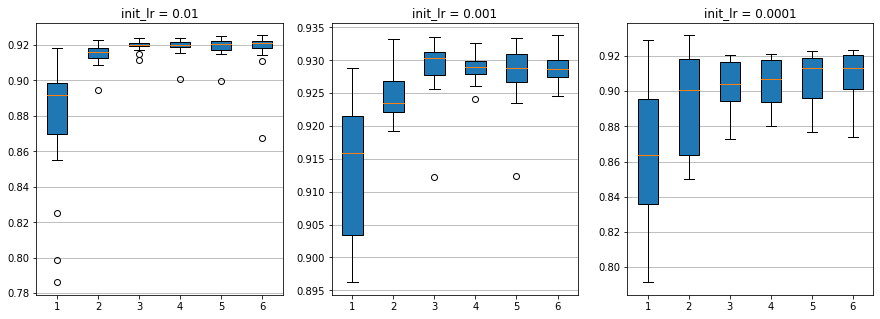

In [13]:
plot_box_among_exp()